In [1]:
import ramCOH.functions as f
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI052-05_2021_11_29_15_47_53_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

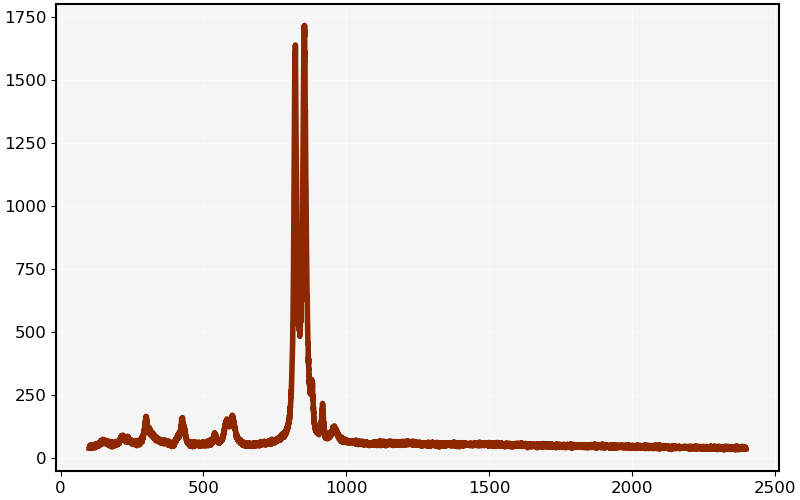

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
amplitudes, centers, widths = f._find_peak_parameters(x, y, 2)
centers, widths

(array([217.137, 298.844, 426.569, 539.78 , 601.416, 821.996, 852.181,
        854.209, 855.366, 879.337, 917.268, 958.094]),
 array([14.86788072, 12.13446426, 13.97204288,  7.35584247, 35.24251582,
         7.93609288,  0.43501632, 13.57505188,  0.20944071,  2.19677376,
         5.880456  ,  9.97681818]))

In [24]:
ranges = f._get_peakFit_ranges(centers, widths, 4)
ranges

[[157.66547712687168, 347.38185703409295],
 [370.6808284727168, 742.3860632761739],
 [790.2516284696055, 998.0012727287043]]

In [58]:
test = ranges[0]
xtrim, ytrim = f._trimxy_ranges(x, y, test)

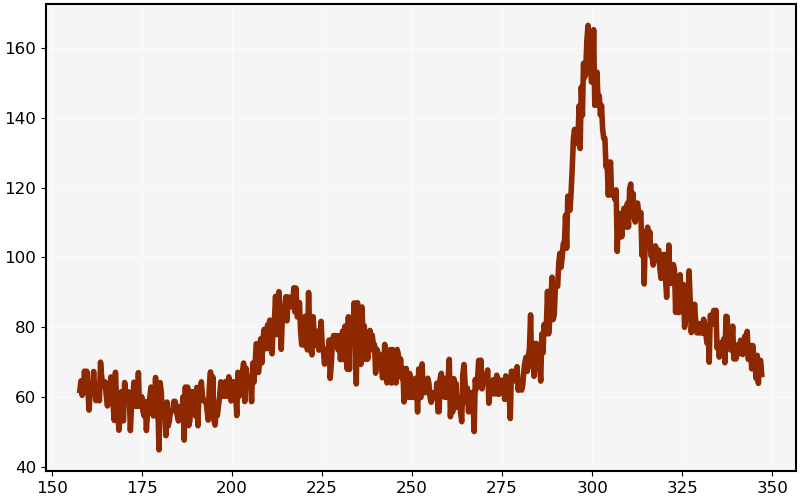

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.show()

In [60]:
noise, spline = f._calculate_noise(xtrim, ytrim)
noise

4.2902958799909845

In [61]:
params, r2, fit_noise = f.deconvolve_curve(xtrim, ytrim, noise_threshold= 1.4, prominence=3)
print(r2, fit_noise)

0.9971588568338928 5.109599398942764


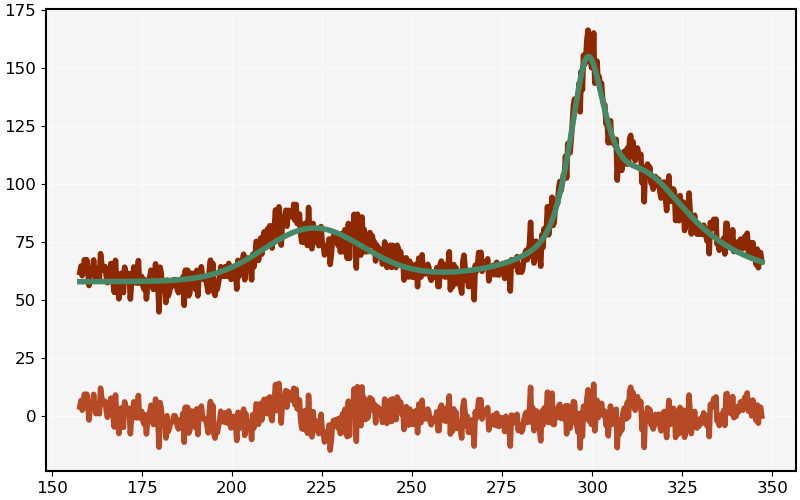

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
plt.plot(xtrim, ytrim - f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, )
plt.show()

In [63]:
params

array([[2.22581540e+02, 2.98590272e+02, 3.13193549e+02],
       [2.22046933e+01, 7.00239811e+01, 4.57387924e+01],
       [1.38397862e+01, 4.91293042e+00, 1.70340651e+01],
       [9.21887918e-17, 4.34501392e-01, 8.28241454e-01],
       [9.57917024e+00, 9.57880630e+00, 9.57860904e+00]])